## Colab setup and libraries
Importing libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



Importing data


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/
data = pd.read_excel('marketing_campaign.xlsx')


Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


##Exploratory Data Analysis

In [ ]:
print('Dataset shape:', data.shape)


Dataset shape: (2240, 29)


In [ ]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
duplicates = data.duplicated()
duplicates.value_counts()

False    2240
dtype: int64

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data[data['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
completeness = (data.shape[0] - data.isnull().sum().sum()) / data.shape[0]
print("Completeness: {:.2f} %".format(completeness*100))

Completeness: 98.93 %


Since the number of null values is low - we can delete the samples with null values.

In [ ]:
data = data.dropna()

In [ ]:
data['NumPurchases']=data["NumDealsPurchases"]+data["NumStorePurchases"]+data["NumCatalogPurchases"]+data["NumWebPurchases"]
data['NumAcceptedCmp']=data["AcceptedCmp3"]+data["AcceptedCmp2"]+data["AcceptedCmp1"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]
data['NumAcceptedCmp'].value_counts()

data=data.drop(columns=['Z_Revenue','Z_CostContact'])
data["Childrenhome"]=data["Kidhome"]+data["Teenhome"]

<ipython-input-13-1edc34dc14f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumPurchases']=data["NumDealsPurchases"]+data["NumStorePurchases"]+data["NumCatalogPurchases"]+data["NumWebPurchases"]
<ipython-input-13-1edc34dc14f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumAcceptedCmp']=data["AcceptedCmp3"]+data["AcceptedCmp2"]+data["AcceptedCmp1"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]


<Axes: >

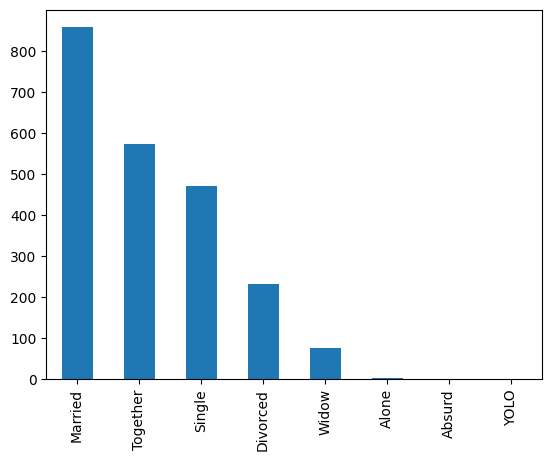

In [ ]:
data['Marital_Status'].value_counts().plot(kind='bar')

<Axes: >

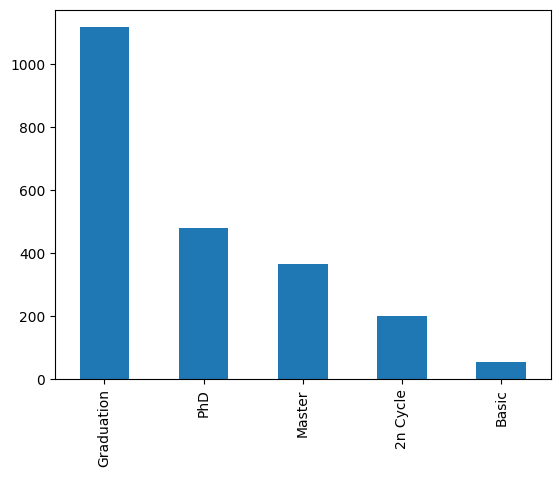

In [ ]:
data['Education'].value_counts().plot(kind='bar')

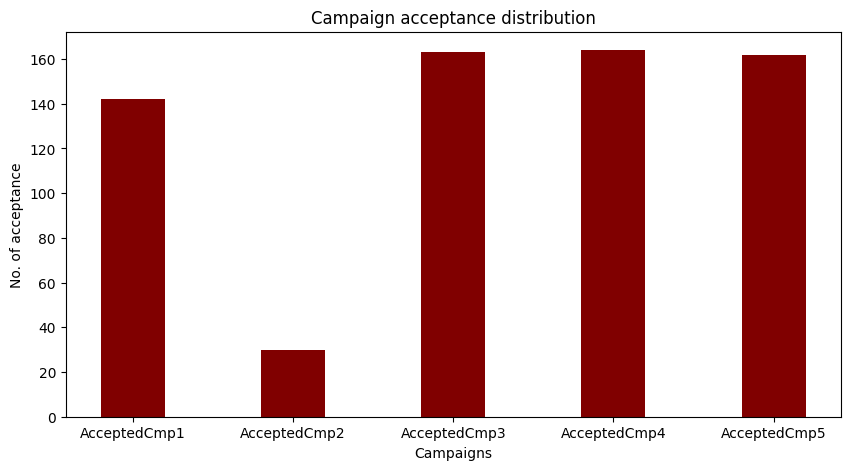

In [ ]:
#Accepted Statistics
accStats=[]
# accStats.append(data[data['NumAcceptedCmp']==0].shape[0])
accStats.append(data[data['AcceptedCmp1']==1].shape[0])
accStats.append(data[data['AcceptedCmp2']==1].shape[0])
accStats.append(data[data['AcceptedCmp3']==1].shape[0])
accStats.append(data[data['AcceptedCmp4']==1].shape[0])
accStats.append(data[data['AcceptedCmp5']==1].shape[0])

campaigns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']


fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(campaigns, accStats, color ='maroon',
        width = 0.4)

plt.xlabel("Campaigns")
plt.ylabel("No. of acceptance")
plt.title("Campaign acceptance distribution")
plt.show()

In [ ]:
cmp1=data[data['AcceptedCmp1']==1]
cmp1=cmp1.drop(columns=campaigns)

cmp2=data[data['AcceptedCmp2']==1]
cmp2=cmp2.drop(columns=campaigns)

cmp3=data[data['AcceptedCmp3']==1]
cmp3=cmp3.drop(columns=campaigns)

cmp4=data[data['AcceptedCmp4']==1]
cmp4=cmp4.drop(columns=campaigns)

cmp5=data[data['AcceptedCmp5']==1]
cmp5=cmp5.drop(columns=campaigns)


### Campaing 1 - insights of customers that accepted

In [ ]:
cmp1.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,NumPurchases,NumAcceptedCmp,Childrenhome
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.0,142.000000,142.000000,142.000000,142.000000
mean,5362.161972,1968.380282,78872.626761,0.084507,0.204225,46.683099,758.028169,55.521127,435.288732,92.366197,...,1.387324,5.753521,6.126761,8.021127,3.514085,0.0,0.556338,21.288732,2.056338,0.288732
std,3083.338047,13.515283,11337.015726,0.326011,0.421728,28.469561,335.813671,55.218678,264.221366,73.684922,...,1.325412,2.170684,2.520439,2.693487,2.037715,0.0,0.498575,4.388219,0.973220,0.590480
min,146.000000,1944.000000,37929.000000,0.000000,0.000000,1.000000,152.000000,0.000000,21.000000,0.000000,...,0.000000,2.000000,1.000000,4.000000,1.000000,0.0,0.000000,12.000000,1.000000,0.000000
25%,2805.750000,1957.000000,73065.000000,0.000000,0.000000,25.000000,498.000000,19.250000,204.000000,32.000000,...,1.000000,4.000000,4.000000,6.000000,2.000000,0.0,0.000000,18.000000,1.000000,0.000000
50%,4972.500000,1969.000000,79967.000000,0.000000,0.000000,44.500000,761.500000,29.500000,437.500000,76.500000,...,1.000000,5.000000,6.000000,8.000000,3.000000,0.0,1.000000,21.000000,2.000000,0.000000
75%,7940.250000,1978.750000,85663.750000,0.000000,0.000000,71.750000,1008.250000,84.500000,616.250000,146.750000,...,1.000000,7.000000,8.000000,10.000000,5.000000,0.0,1.000000,24.000000,3.000000,0.000000
max,10965.000000,1994.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,190.000000,974.000000,253.000000,...,8.000000,11.000000,11.000000,13.000000,9.000000,0.0,1.000000,35.000000,4.000000,3.000000


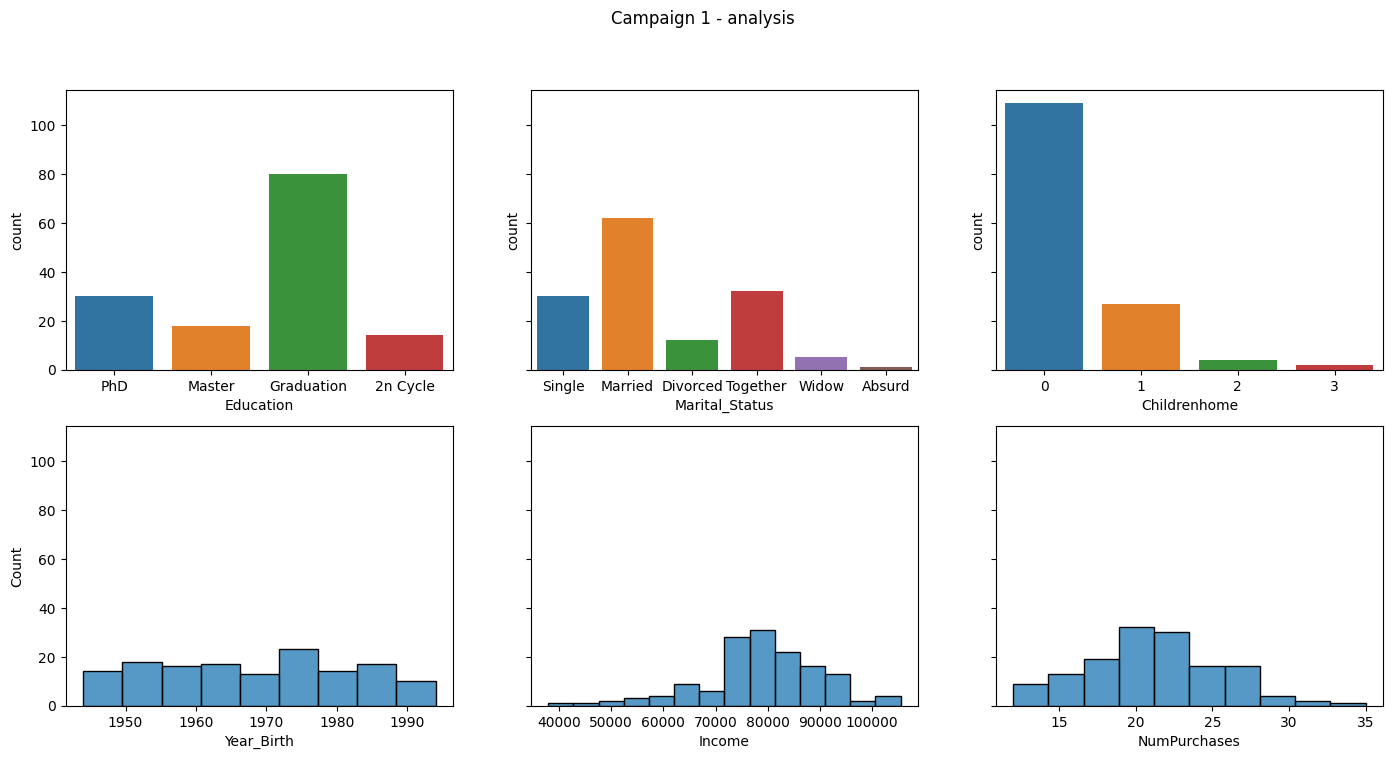

In [ ]:
df=cmp1
fig, axes = plt.subplots(2, 3,  figsize=(17, 8), sharey=True)
fig.suptitle('Campaign 1 - analysis')
sns.countplot(ax=axes[0,0], x="Education", data=df)
sns.countplot(ax=axes[0,1], x="Marital_Status", data=df)
sns.countplot(ax=axes[0,2], x="Childrenhome", data=df)
sns.histplot(ax=axes[1, 0], x="Year_Birth", data=df)
sns.histplot(ax=axes[1, 1], x="Income", data=df)
sns.histplot(ax=axes[1, 2], x="NumPurchases", data=df)
plt.xticks(rotation = 0)
plt.show()

### Campaing 2 - insights of customers that accepted

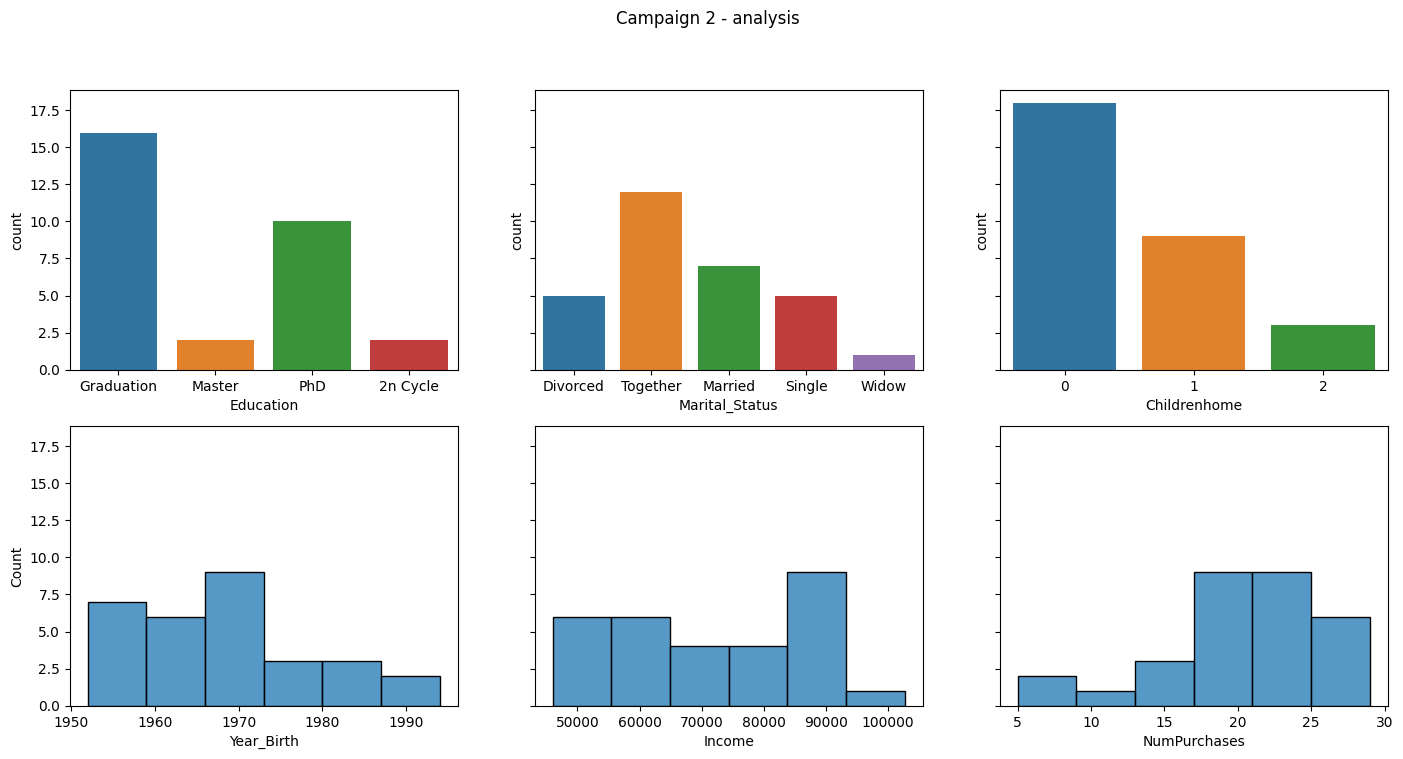

In [ ]:
df=cmp2
fig, axes = plt.subplots(2, 3,  figsize=(17, 8), sharey=True)
fig.suptitle('Campaign 2 - analysis')
sns.countplot(ax=axes[0,0], x="Education", data=df)
sns.countplot(ax=axes[0,1], x="Marital_Status", data=df)
sns.countplot(ax=axes[0,2], x="Childrenhome", data=df)
sns.histplot(ax=axes[1, 0], x="Year_Birth", data=df)
sns.histplot(ax=axes[1, 1], x="Income", data=df)
sns.histplot(ax=axes[1, 2], x="NumPurchases", data=df)
plt.xticks(rotation = 0)
plt.show()

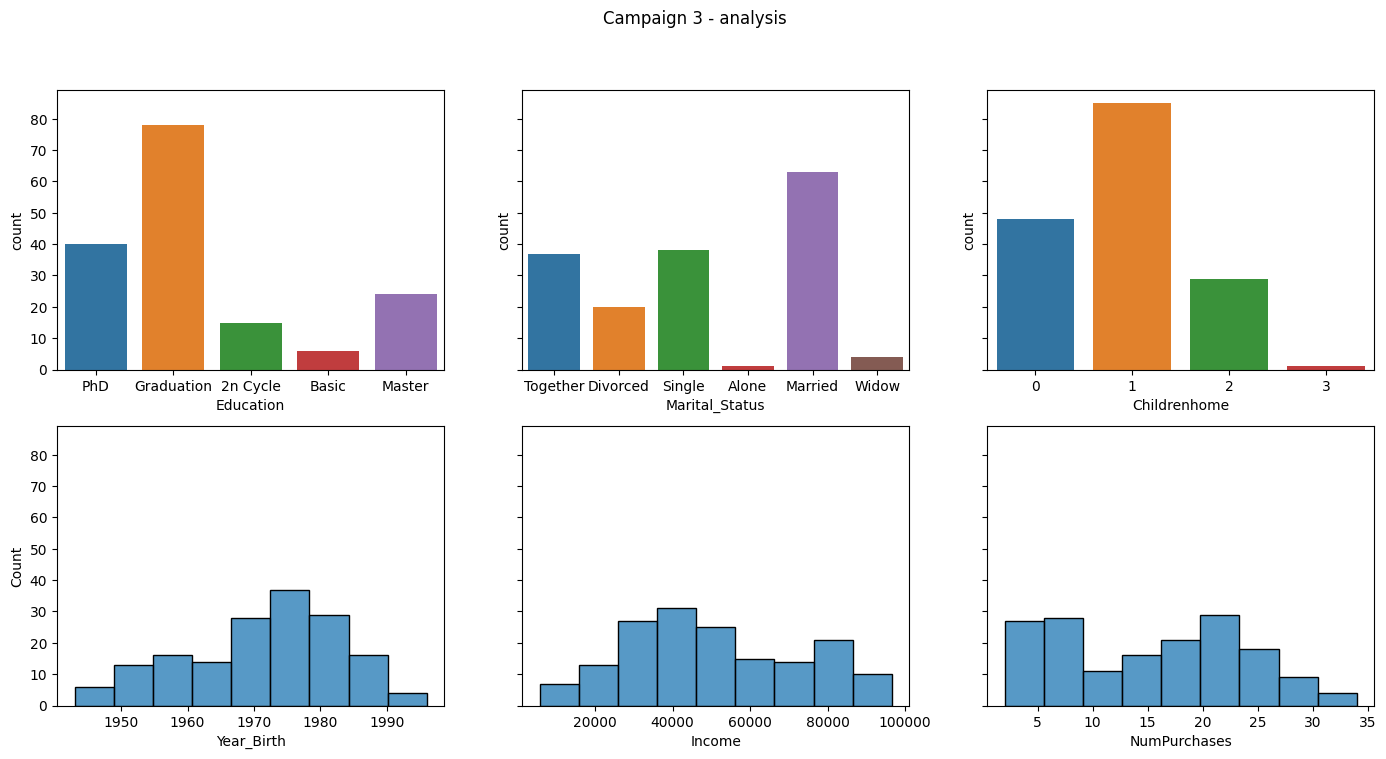

In [ ]:
df=cmp3
fig, axes = plt.subplots(2, 3,  figsize=(17, 8), sharey=True)
fig.suptitle('Campaign 3 - analysis')
sns.countplot(ax=axes[0,0], x="Education", data=df)
sns.countplot(ax=axes[0,1], x="Marital_Status", data=df)
sns.countplot(ax=axes[0,2], x="Childrenhome", data=df)
sns.histplot(ax=axes[1, 0], x="Year_Birth", data=df)
sns.histplot(ax=axes[1, 1], x="Income", data=df)
sns.histplot(ax=axes[1, 2], x="NumPurchases", data=df)
plt.xticks(rotation = 0)
plt.show()

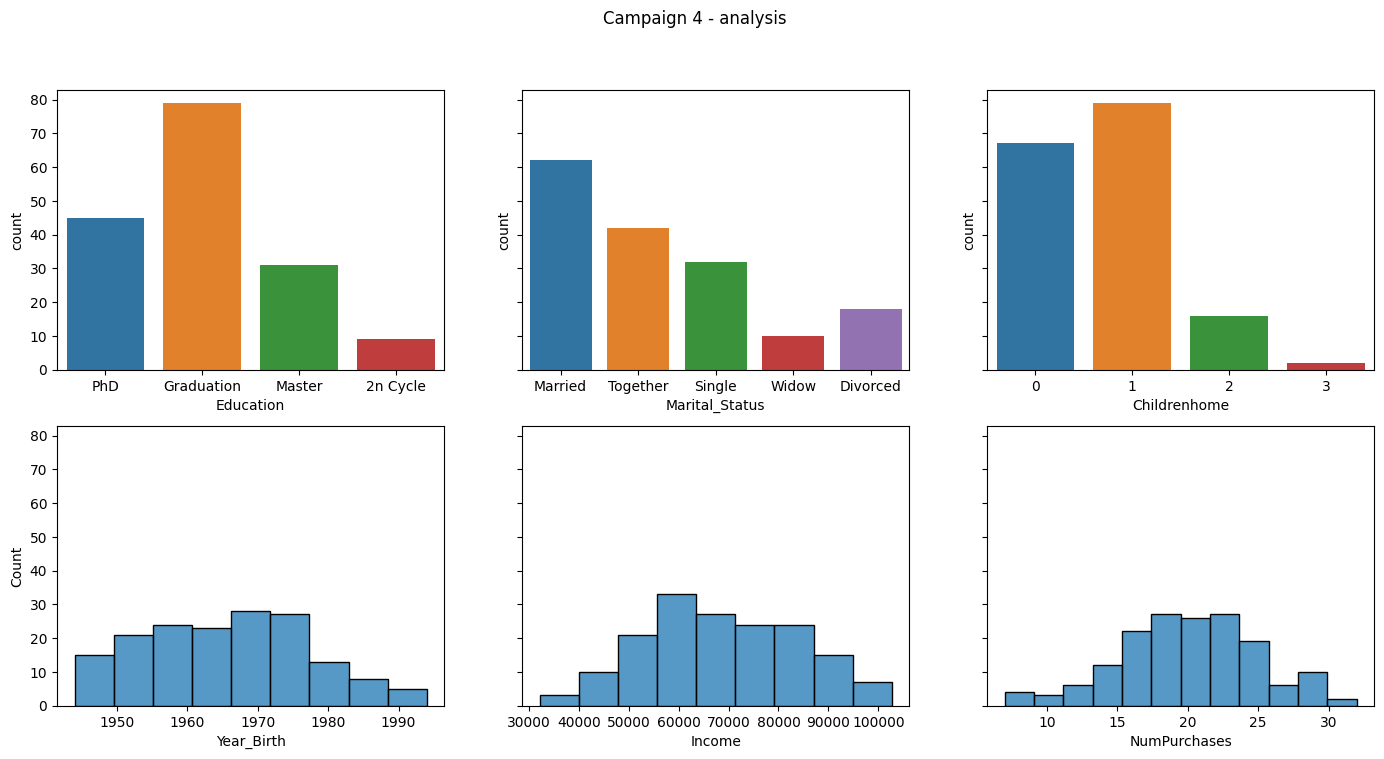

In [ ]:
df=cmp4
fig, axes = plt.subplots(2, 3,  figsize=(17, 8), sharey=True)
fig.suptitle('Campaign 4 - analysis')
sns.countplot(ax=axes[0,0], x="Education", data=df)
sns.countplot(ax=axes[0,1], x="Marital_Status", data=df)
sns.countplot(ax=axes[0,2], x="Childrenhome", data=df)
sns.histplot(ax=axes[1, 0], x="Year_Birth", data=df)
sns.histplot(ax=axes[1, 1], x="Income", data=df)
sns.histplot(ax=axes[1, 2], x="NumPurchases", data=df)
plt.xticks(rotation = 0)
plt.show()

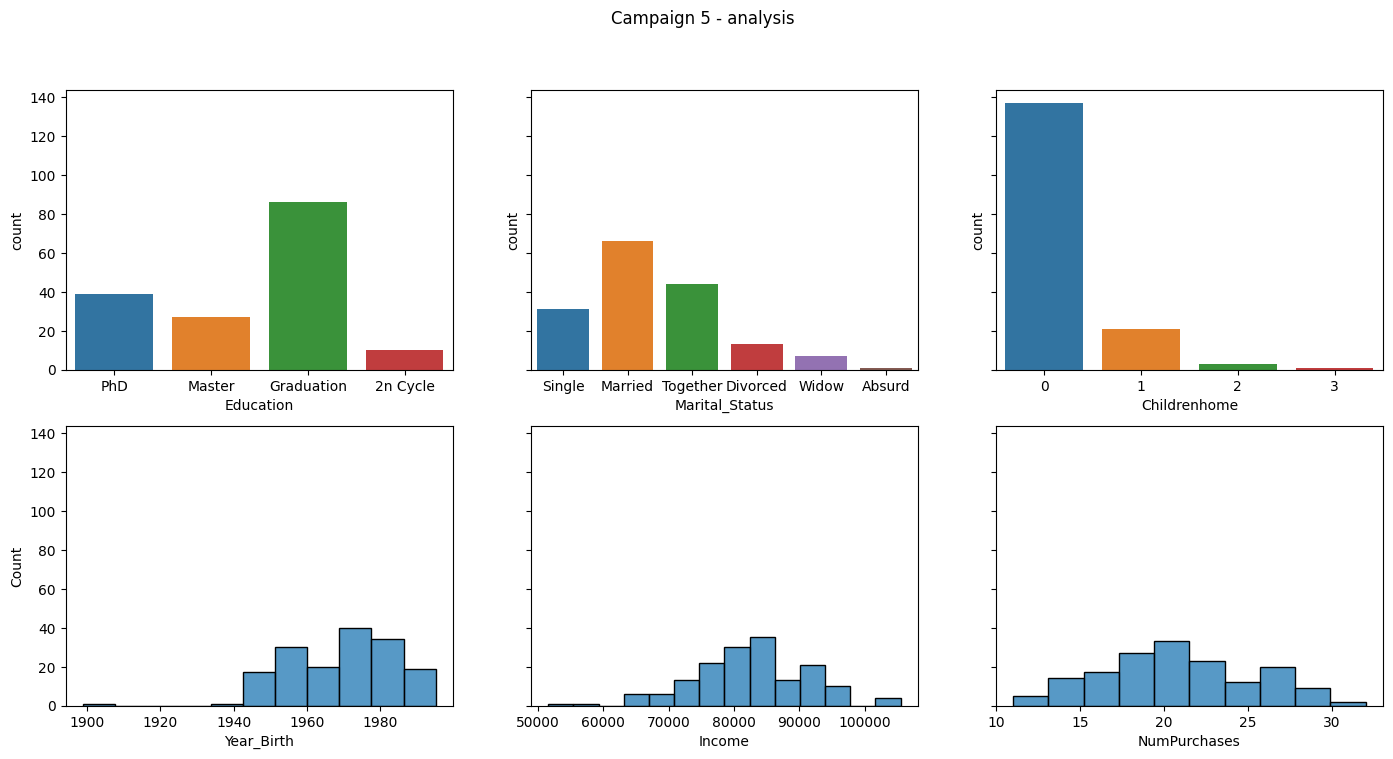

In [ ]:
df=cmp5
fig, axes = plt.subplots(2, 3,  figsize=(17, 8), sharey=True)
fig.suptitle('Campaign 5 - analysis')
sns.countplot(ax=axes[0,0], x="Education", data=df)
sns.countplot(ax=axes[0,1], x="Marital_Status", data=df)
sns.countplot(ax=axes[0,2], x="Childrenhome", data=df)
sns.histplot(ax=axes[1, 0], x="Year_Birth", data=df)
sns.histplot(ax=axes[1, 1], x="Income", data=df)
sns.histplot(ax=axes[1, 2], x="NumPurchases", data=df)
plt.xticks(rotation = 0)
plt.show()

## Correlation & multivariate analysis of variance

In [ ]:
from statsmodels.multivariate.manova import MANOVA

fit = MANOVA.from_formula('NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth ~ Education', data=data)

print(fit.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.4073 5.0000 2207.0000 642.2069 0.0000
         Pillai's trace 0.5927 5.0000 2207.0000 642.2069 0.0000
 Hotelling-Lawley trace 1.4549 5.0000 2207.0000 642.2069 0.0000
    Roy's greatest root 1.4549 5.0000 2207.0000 642.2069 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       Education        Value   Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9614 20.0000 7320.7408  4.3681 0.0000
         Pillai's trace 0.0387 20.0000 8840.0000  4.3236 0.

In [ ]:
fit = MANOVA.from_formula('NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth ~ Marital_Status', data=data)

print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         Intercept        Value  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.9872 5.0000 2204.0000  5.7027 0.0000
           Pillai's trace 0.0128 5.0000 2204.0000  5.7027 0.0000
   Hotelling-Lawley trace 0.0129 5.0000 2204.0000  5.7027 0.0000
      Roy's greatest root 0.0129 5.0000 2204.0000  5.7027 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
     Marital_Status     Value   Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9826 35.0000  9273.8204  1.1076 0.3040
         Pillai's trace 0.0175 35.0000 11040.

In [ ]:
fit = MANOVA.from_formula('AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp5 ~ Marital_Status', data=data)

print(fit.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9946 4.0000 2205.0000  2.9878 0.0179
          Pillai's trace 0.0054 4.0000 2205.0000  2.9878 0.0179
  Hotelling-Lawley trace 0.0054 4.0000 2205.0000  2.9878 0.0179
     Roy's greatest root 0.0054 4.0000 2205.0000  2.9878 0.0179
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
     Marital_Status     Value   Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9878 28.0000 7951.6628  0.9674 0.5137
         Pillai's trace 0.0122 28.0000 8832.0000  0.9671 0.

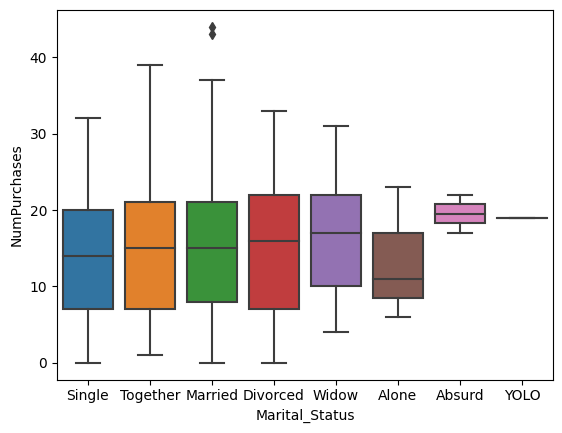

In [ ]:
sns.boxplot( y=data["NumPurchases"], x=data["Marital_Status"] );
plt.show()

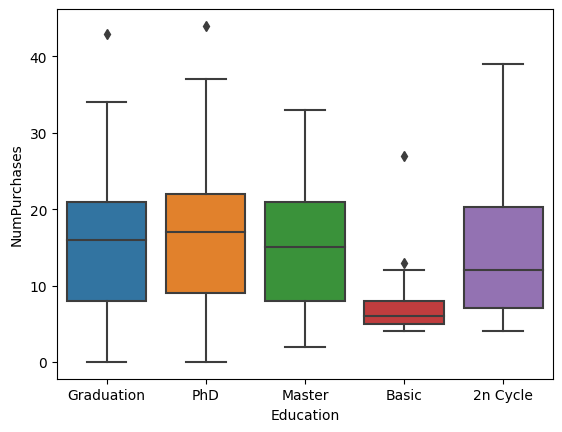

In [ ]:
sns.boxplot( y=data["NumPurchases"], x=data["Education"] );
plt.show()

<ipython-input-29-67c02ae9323d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data_for_correlation.corr()


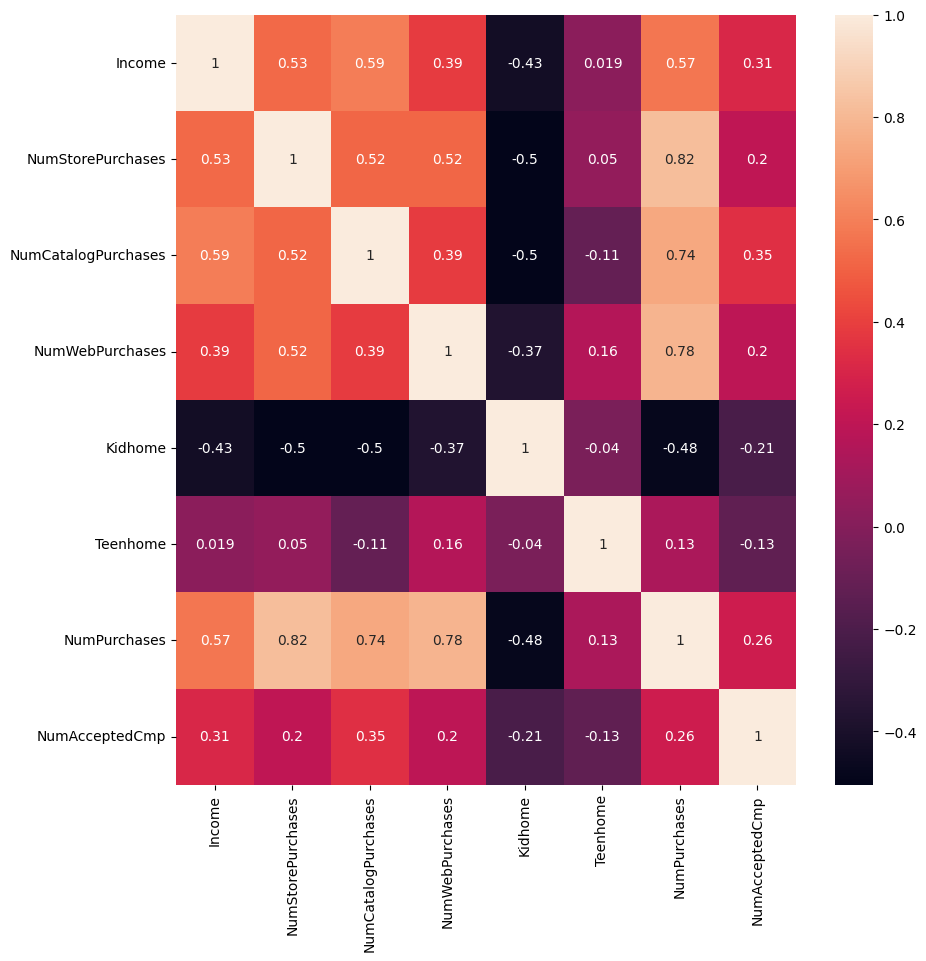

In [ ]:
data_for_correlation=data[['Education','Marital_Status','Income','NumStorePurchases','NumCatalogPurchases','NumWebPurchases','Kidhome','Teenhome','NumPurchases','NumAcceptedCmp']]
corr_matrix=data_for_correlation.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Customer Segmentation

In [ ]:
data['Education'].nunique()

5

In [ ]:
data['Marital_Status'].nunique()

8

In [ ]:
data['Education'] = data['Education'].astype('category')
data['Education_codes'] = data['Education'].cat.codes

data['Marital_Status'] = data['Marital_Status'].astype('category')
data['Marital_Status_codes'] = data['Marital_Status'].cat.codes
data_for_segmentation=data.drop(columns=['Education','Marital_Status','Dt_Customer','ID'])




In [ ]:
kmeans = KMeans(5)
kmeans.fit(data_for_segmentation)
identified_clusters = kmeans.fit_predict(data_for_segmentation)
identified_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 4, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(data_for_segmentation, identified_clusters)
silhouette_avg


0.5302797639474203

Standarization

In [ ]:
scaler = StandardScaler()
segmentation_std=scaler.fit_transform(data_for_segmentation)

## Dimensionality Reduction using PCA

In [ ]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([2.77473007e-01, 9.50405640e-02, 8.96416879e-02, 5.35477966e-02,
       4.23398051e-02, 3.92219214e-02, 3.62829167e-02, 3.58193724e-02,
       3.56426722e-02, 3.46285675e-02, 2.86414368e-02, 2.57060130e-02,
       2.32798896e-02, 2.22789245e-02, 2.18700438e-02, 1.97660458e-02,
       1.89388150e-02, 1.65809240e-02, 1.52252388e-02, 1.48593364e-02,
       1.37954265e-02, 1.25002307e-02, 1.11417996e-02, 8.47180150e-03,
       7.30576352e-03, 5.47219018e-32, 6.57852989e-33, 3.17828718e-33])

In [ ]:
pca=PCA(n_components=4)

In [ ]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [ ]:
scores_pca=pca.transform(segmentation_std)

## KMeans clustering with PCA


In [ ]:
wcss=[]
for i in range(1,21):
  kmeans_pca=KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Now we plot WCSS and use the elbow method to determine relevant number of clusters:

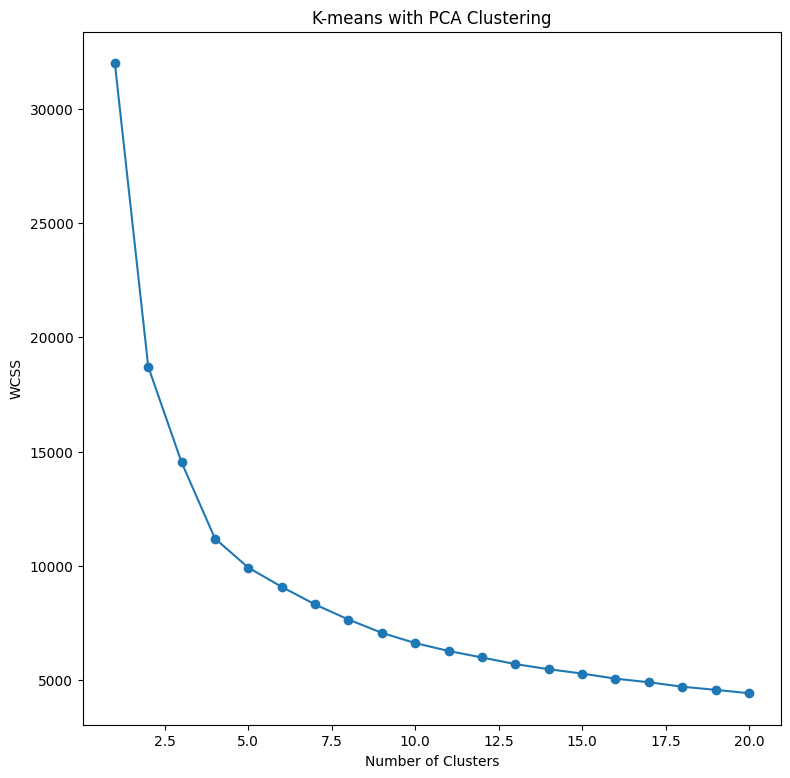

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(range(1,21), wcss, marker='o', linestyle = '-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA Clustering")
plt.show()

In [ ]:
kmeans_pca=KMeans(n_clusters=4, init = 'k-means++', random_state = 42)


In [ ]:
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
df_segm_pca_kmeans=pd.concat([data_for_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ["Component 1", "Component 2", "Component 3"]
df_segm_pca_kmeans["Segment K-means PCA"]=kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumPurchases,NumAcceptedCmp,Childrenhome,Education_codes,Marital_Status_codes,0,Component 1,Component 2,Component 3,Segment K-means PCA
0,1957,58138.0,0,0,58,635,88,546,172,88,...,25,0,0,2,4,3.995443,-0.693879,-1.105921,1.809085,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,6,0,2,2,4,-2.934284,-0.171000,0.244240,-1.027490,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,21,0,0,2,5,1.881029,-0.657591,-1.454837,-0.292923,1
3,1984,26646.0,1,0,26,11,4,20,10,3,...,8,0,1,2,5,-2.649688,1.169274,-0.827716,0.412933,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,19,0,1,4,3,-0.352769,-0.748809,-0.273920,0.521464,3


In [ ]:
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2: 'third',
                                                                             3: 'fourth'})

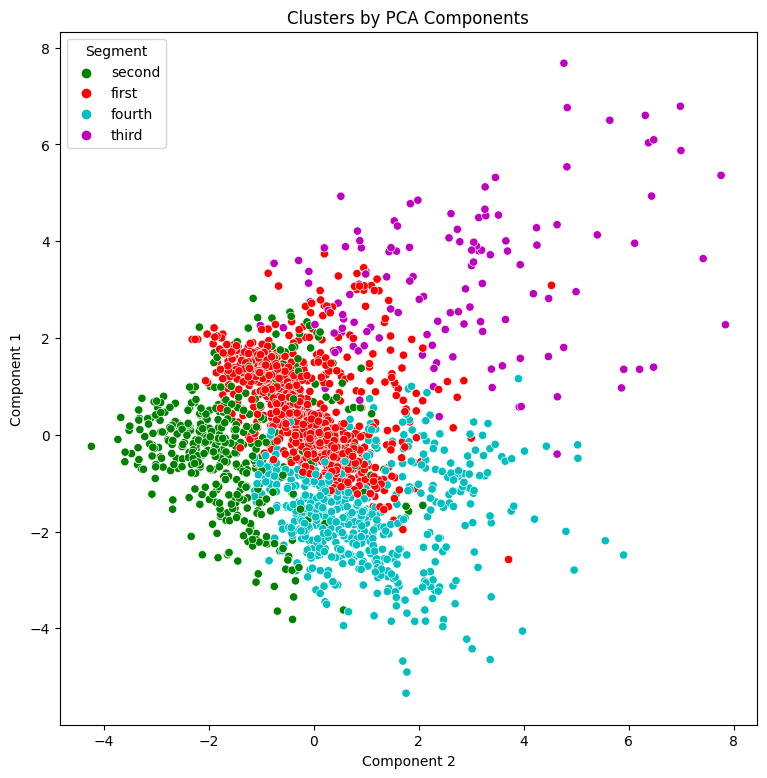

In [ ]:
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Segment'], palette =['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()